# **ASSIGNMENT-4

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# **Discrete Fourier Transform

1.Write functions to implement the dft and idft

In [2]:
#function for implementing dft

def dft(x):
    t = []
    N = len(x)
    for k in range(N):
        a = 0
        for n in range(N):
            a += x[n]*np.exp(-2j*np.pi*k*n*(1/N))
        t.append(a)
    return t

#function for implementing idft

def idft(t):
    x = []
    N = len(t)
    for n in range(N):
        a = 0
        for k in range(N):
            a += t[k]*np.exp((2j*np.pi*k*n)/N)
        a /= N
        x.append(a)
    return x

2.Write a function to compute the circular convolution of two sequences.
Find the circular convolution of x = [1, 2, 3, 0, 0, 0, 0] and h = [1, 1, 1, 1, 1, 1, 1] using the function

circular convolution of x & h = [6. 6. 6. 6. 6. 6. 6.]


<Figure size 432x288 with 0 Axes>

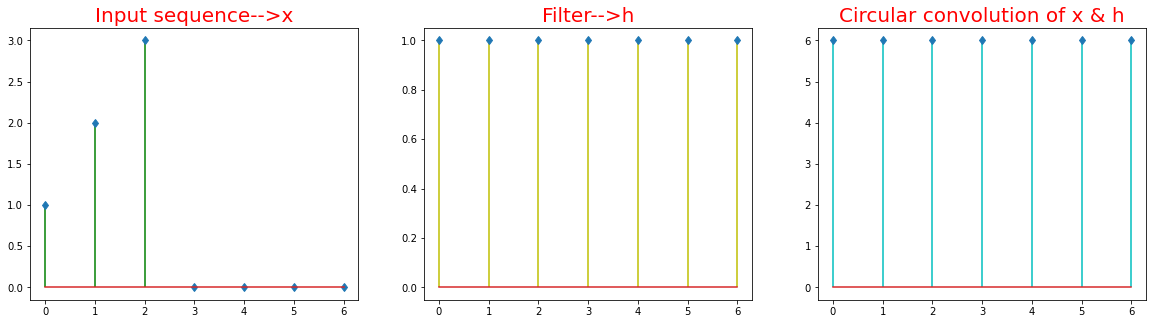

In [3]:
#function for implementing circular convolution of two sequences

def comp_circ_conv(filt,seqn):
    L = len(filt)
    M = len(seqn)
    N = max(L,M)
    filtN = np.zeros(N)
    seqnN = np.zeros(N)
    Hx = np.zeros(N)
    filtN[:L] = filt[:]
    filtNflip = filtN[::-1,...]
    filtNflip = np.roll(filtNflip,1)
    seqnN[:M] = seqn[:]
    for k in range(N):
        ht = np.roll(filtNflip,k)
        Hx[k] = sum(seqnN * ht)
    draw_seqn_and_filt(filtN,seqnN,Hx)
    return Hx

#function for plotting input,filter,output

def draw_seqn_and_filt(filt,seqn,conv):
    plt.figure(1)
    fig = plt.figure(10,figsize=(20,5))
    plt.subplot(131)
    plt.title('Input sequence-->x',color='r',size=20)
    plt.stem(seqn,linefmt='g',markerfmt ='d',use_line_collection=True)
    
    plt.subplot(132)
    plt.title('Filter-->h',color='r',size=20)
    plt.stem(filt,linefmt='y',markerfmt ='d',use_line_collection=True)
    
    plt.subplot(133)
    plt.title('Circular convolution of x & h',color='r',size=20)
    print('circular convolution of x & h =',np.array(conv))
    plt.stem(conv,linefmt='c',markerfmt ='d',use_line_collection=True)
    
filt=[1, 1, 1, 1, 1, 1, 1]
seqn=[1, 2, 3, 0, 0, 0,0]
Circular_convolution=comp_circ_conv(filt,seqn)

3.A signal is given as x(t) = cos2πf t where f = 30 Hz. The signal is sampled
at 100 times per second for 10 seconds and then its DFT is computed. Plot
the spectrum versus frequency in Hz. What is the magnitude of DFT at
35 Hz? Is this value non-zero? If so then why?

The magnitude of DFT at 35 Hz is non-zero


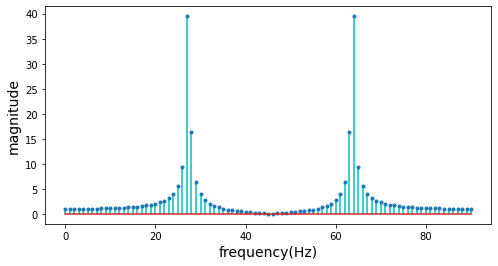

In [4]:
fig = plt.figure(1,figsize=(8,4))
t1 = np.arange(0,0.91,0.01)
f=30
x_t=np.cos(2*np.pi*f*t1)
xt_dft=dft(x_t)
w=np.array(np.abs(xt_dft),dtype='complex')
plt.stem(w,linefmt='c',markerfmt ='.',use_line_collection=True)
plt.xlabel('frequency(Hz)',size=14)
plt.ylabel('magnitude',size=14)
print('The magnitude of DFT at 35 Hz is non-zero')

4.Consider the two sequences x = [1, −3, 1, 5] and y = [7, −7, −9, −3]. Does
there exist a sequence h such that y is the circular convolution of x and
h. Find h using DFT and IDFT.

In [5]:
x = np.array([7,-7,-9,-3])
y = np.array([1,-3,1,5])
x1 = dft(x)
y1 = dft(y)
h1 = [y1/x1 for y1,x1 in zip(y1,x1)]
h11 = idft(h1)
print('Impulse reponse--> (h[n]) using dft & idft = ',np.real(h11))

Impulse reponse--> (h[n]) using dft & idft =  [-0.0245098  -0.31862745 -0.14215686  0.15196078]


5.Compute the energy of the signal x[n] = (3/4)nu[n] for 0 ≤ n ≤ 50. If the
DFT of this signal is X(k) then what is the energy of X(k) and how does
it relate to that of x[n]

In [6]:
x1=[((3/4)**i) for i in range(0,50)]
y1=sum((np.abs(x1[i])**2) for i in range(len(x1)))
print('Energy of the signal-->(E(x[n])) =',np.round(y1,2))
q=dft(x1)
y2=sum((np.abs(q[i])**2) for i in range(len(x1)))
N2=len(x1)
y3=(1/N2)*sum((np.abs(q[i])**2) for i in range(len(x1)))
print('\nEnergy of the dft of the signal-->(E(x[k])) =',np.round(y2,2))
print('\nEnergy of the dft of the signal / N -->(E(x[k])/N) =',np.round(y3,2))
print('\n""""""E(x[n]) = (E(x[k]))/N""""""(where N is the time period of the sequence)')

Energy of the signal-->(E(x[n])) = 2.29

Energy of the dft of the signal-->(E(x[k])) = 114.29

Energy of the dft of the signal / N -->(E(x[k])/N) = 2.29

""""""E(x[n]) = (E(x[k]))/N""""""(where N is the time period of the sequence)


# **Discrete Cosine Transform

1.Write functions to implement the dct and idct

In [7]:
#function for implementing dct

def dct1(x1):
    t = []
    N = len(x1)
    for m in range(N):
        x = 0
        for n in range(N):
            if  m == 0:
                x += (np.sqrt(2/N))*((x1[n])*(np.sqrt(1/2))*(np.cos(((np.pi*m)/(2*N))*(2*n+1))))
            else:
                x += (np.sqrt(2/N))*((x1[n])*1*(np.cos(((np.pi*m)/(2*N))*(2*n+1))))
        t.append(x)
    return t

#function for implementing idct

def idct1(x1):
    t = []
    N = len(x1)
    for n in range(N):
        x = 0
        for m in range(N):
            if  m == 0:
                x += (np.sqrt(2/N))*((x1[m])*(np.sqrt(1/2))*np.cos(((np.pi*m)/(2*N))*(2*n+1)))
            else:
                x += (np.sqrt(2/N))*((x1[m])*1*np.cos(((np.pi*m)/(2*N))*(2*n+1)))
        t.append(x)
    return t

#functions for energy and mean square error

def energy(x1):
    energy=sum((np.abs(x1[i])**2) for i in range(len(x1)))
    return energy

def meansquareerror(a,b):
    N=len(a)
    f1=[(a[i]-b[i])**2 for i in range(N)]
    f2=sum(np.abs(f1))
    return f2/N   

2.Consider a signal x[n] = [8, 16, 24, 32, 40, 48, 56, 64] of length N = 8. Compute the DCT of this signal. Now keep only the first four DCT coefficients
while discarding the rest and then compare its energy with that of x[n].
Compute the inverse DCT of the sequence obtained and plot it alongside
x[n]. Also compute the mean square error between the two signals

 x[n] = [8, 16, 24, 32, 40, 48, 56, 64]

 dct of the sequence-->x[k] =  [102. -52.  -0.  -5.   0.  -2.  -0.  -0.]

 idct of the sequence-->x[n] =  [ 8. 16. 24. 32. 40. 48. 56. 64.]

 energy of the sequence-->E(x[n]) = 13056

 energy of the dct coefficients-->E(x[k]) =  13053.252

 mean_square_error of x[n] and idct =  3.8575298265307477e-28


<StemContainer object of 3 artists>

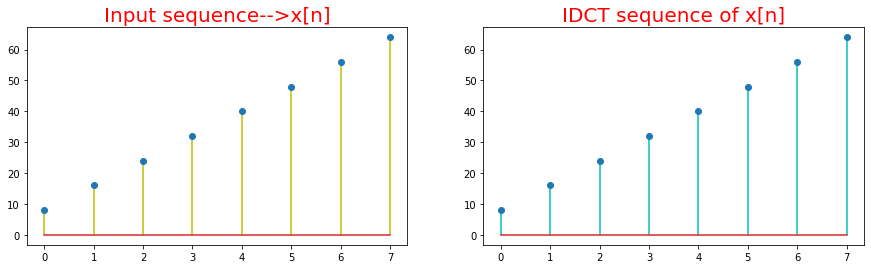

In [8]:
xn = [8, 16, 24, 32, 40, 48, 56, 64]
d=dct1(xn)
d1=d[:4]
d3=idct1(d)
print(' x[n] =',xn)
print('\n dct of the sequence-->x[k] = ',np.round(d))
print('\n idct of the sequence-->x[n] = ',np.round(d3))
print('\n energy of the sequence-->E(x[n]) =',energy(xn))
print('\n energy of the dct coefficients-->E(x[k]) = ',np.round(energy(d1),3))
print('\n mean_square_error of x[n] and idct = ',meansquareerror(xn,d3))
fig = plt.figure(1,figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Input sequence-->x[n]',color='r',size=20)
plt.stem(xn,linefmt='y',use_line_collection=True)
plt.subplot(1,2,2)
plt.title('IDCT sequence of x[n]',color='r',size=20)
plt.stem(d3,linefmt='c',use_line_collection=True)

3.Now repeat the same process with DFT and compare the mean square
errors. Comment on your observations

In [9]:
xn = [8, 16, 24, 32, 40, 48, 56, 64]
d=dft(xn)
d3=idft(d)
print('x[n]  =',xn)
print('\ndft of the sequence-->x[k] = ',np.round(np.abs(d)))
print('\nidft of the sequence-->x[n] = ',d3)
print('\nenergy of the sequence-->E(x[n]) =',energy(xn))
d1=d[:4]
print('\nenergy of the dft coefficients-->E(x[k]) = ',energy(d1))
print('\nmean_square_error of x[n] & idct = ',meansquareerror(xn,d3))

x[n]  = [8, 16, 24, 32, 40, 48, 56, 64]

dft of the sequence-->x[k] =  [288.  84.  45.  35.  32.  35.  45.  84.]

idft of the sequence-->x[n] =  [(7.999999999999992-5.329070518200751e-15j), (16.000000000000014+1.9539925233402755e-14j), (24.00000000000005-3.419486915845482e-14j), (31.99999999999997-3.552713678800501e-14j), (39.99999999999997-1.7763568394002505e-14j), (48+1.199040866595169e-14j), (56+5.0182080713057076e-14j), (63.99999999999999-1.7763568394002505e-14j)]

energy of the sequence-->E(x[n]) = 13056

energy of the dft coefficients-->E(x[k]) =  93184.0

mean_square_error of x[n] & idct =  1.3175702750421068e-27


""""""Mean square error of x[n] & idct of x[n] is small 
and the Mean square error of x[n] & idft of x[n] is high""""""